# Highlighting the differences between HUNT3 and HUNT4

### Install and import required packages

In [133]:
%pip install --quiet -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [134]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import numpy as np
import random

hunt_path = '/cluster/projects/vc/data/mic/closed/MRI_HUNT/images/images_3D_preprocessed/'
hunts = ['HUNT3', 'HUNT4']

### Load and see a random brain-scan pair

We select a random candidate from the closed dataset

In [135]:
entry = os.listdir(os.path.join(hunt_path, hunts[0]))[random.randint(0, len(os.listdir(os.path.join(hunt_path, hunts[0]))) - 1)]
print("Entry to open:", entry)

if os.path.exists(os.path.join(hunt_path, hunts[1], entry)):
    print(f"{entry} exists in both HUNT3 and HUNT4")
else:
    print(f"{entry} does not exist in HUNT4")
    exit()

Entry to open: 04730
04730 exists in both HUNT3 and HUNT4


We load both Brain Scan images (NIfTI files), get their fdata and display the center slice in the series

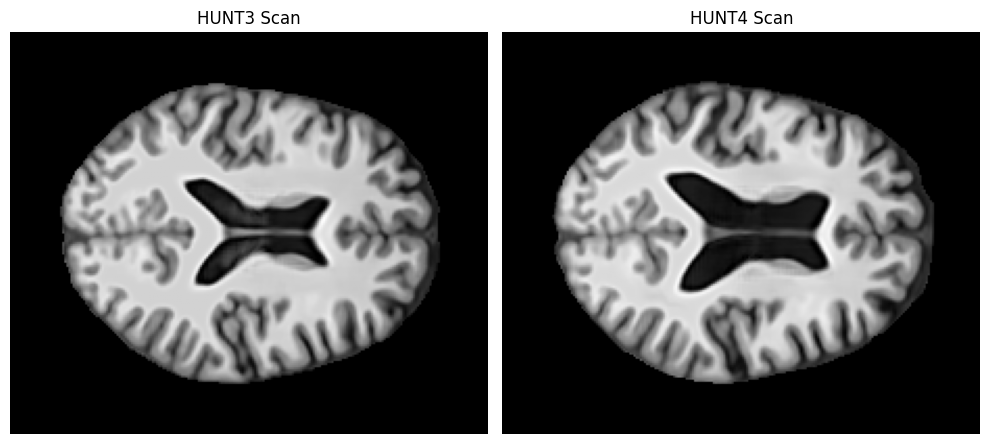

In [136]:
hunt3_img = nib.load(os.path.join(hunt_path, hunts[0], entry, entry+'_0_T1_PREP_MNI.nii.gz'))
hunt3_data = hunt3_img.get_fdata()

hunt4_img = nib.load(os.path.join(hunt_path, hunts[1], entry, entry+'_1_T1_PREP_MNI.nii.gz'))
hunt4_data = hunt4_img.get_fdata()

# Create figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show HUNT3 image
h3_slice = hunt3_data[:, :, hunt3_data.shape[2] // 2]
axs[0].imshow(h3_slice, cmap='gray')
axs[0].set_title('HUNT3 Scan')
axs[0].axis('off')

# Show HUNT4 image
h4_slice = hunt4_data[:, :, hunt4_data.shape[2] // 2]
axs[1].imshow(h4_slice, cmap='gray')
axs[1].set_title('HUNT4 Scan')
axs[1].axis('off')

plt.tight_layout()
plt.show()

## Differences

We now calculate the structural similarity of the two slices. This will show us how similar they are from 0-1, with 0 being totally different and 1 being the same image. As most of the picture is black and the brain doesn't change that much, we should expect a high number

In [137]:
data_range = h3_slice.max() - h3_slice.min()
ssim_3d, _ = structural_similarity(h3_slice, h4_slice, data_range=data_range, channel_axis=None, full=True)
print("Structural Similarity:", ssim_3d)

Structural Similarity: 0.8629358997239875


### Highlighting the differences

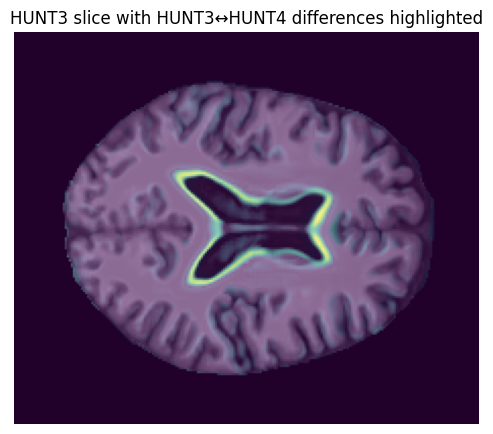

In [138]:
# Simple absolute difference
diff_slice = np.abs(h3_slice - h4_slice)

plt.figure(figsize=(6, 6))
plt.imshow(h3_slice, cmap='gray')
plt.imshow(diff_slice, alpha=0.5)  # default colormap overlays in color
plt.title('HUNT3 slice with HUNT3↔HUNT4 differences highlighted')
plt.axis('off')
plt.show()

### Displaying only the differences

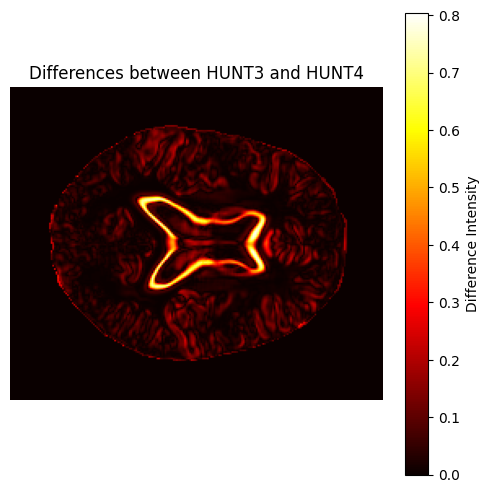

In [139]:
# Display only the differences
plt.figure(figsize=(6, 6))
plt.imshow(diff_slice, cmap='hot')  # 'hot' colormap for differences
plt.title('Differences between HUNT3 and HUNT4')
plt.axis('off')
plt.colorbar(label='Difference Intensity')
plt.show()